In [1]:
import yfinance
import mplfinance as mpf
import matplotlib. pyplot as plt
import numpy as np

from sklearn import preprocessing

# Download Data

In [2]:
data = yfinance.download(
            tickers=['AAPL'],
            start='2021-01-01',
            end=None,
            interval='1d',
            auto_adjust=True,
            prepost=False
        )

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [4]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000
2021-12-14,175.250000,177.740005,172.210007,174.330002,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700


# Log Ratio = Log(T / T-1)

In [5]:
data_log_ratio = data.copy()
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [6]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000
2021-12-14,175.250000,177.740005,172.210007,174.330002,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700


In [7]:
data_log_ratio_t = data_log_ratio
data_log_ratio_t_minus_1 = data_log_ratio.shift(1)

In [8]:
data_log_ratio_t.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [9]:
data_log_ratio_t.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000
2021-12-14,175.250000,177.740005,172.210007,174.330002,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700


In [10]:
data_log_ratio_t_minus_1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,133.258497,133.914457,130.912956,131.877014,99116600.0
2021-01-05,132.701914,132.791359,125.983331,128.617096,143301900.0
2021-01-06,128.100300,130.932844,127.643112,130.207306,97664900.0
2021-01-07,126.937458,130.247057,125.605665,125.824318,155088000.0


In [11]:
data_log_ratio_t_minus_1.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-13,175.210007,179.630005,174.690002,179.449997,115228100.0
2021-12-14,181.119995,182.130005,175.529999,175.740005,153237000.0
2021-12-15,175.250000,177.740005,172.210007,174.330002,139380400.0
2021-12-16,175.110001,179.500000,172.309998,179.300003,131063300.0
2021-12-17,179.279999,181.139999,170.750000,172.259995,150185800.0


In [12]:
data_log_ratio = data_log_ratio_t / data_log_ratio_t_minus_1
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.995823,0.991613,0.962344,0.975281,1.445791
2021-01-05,0.965324,0.986004,1.013175,1.012364,0.681532
2021-01-06,0.990922,0.994762,0.984038,0.966338,1.587960
2021-01-07,1.005011,1.004426,1.011711,1.034123,0.706555


In [13]:
data_log_ratio = data_log_ratio.apply(np.log)
data_log_ratio.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.004185,-0.008422,-0.038383,-0.025030,0.368657
2021-01-05,-0.035292,-0.014095,0.013089,0.012288,-0.383411
2021-01-06,-0.009119,-0.005251,-0.016091,-0.034241,0.462450
2021-01-07,0.004998,0.004416,0.011643,0.033554,-0.347354


In [14]:
data_log_ratio.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-13,0.033174,0.013822,0.004797,-0.020891,0.285072
2021-12-14,-0.032946,-0.024399,-0.019095,-0.008056,-0.094779
2021-12-15,-0.000799,0.009853,0.000580,0.028110,-0.061526
2021-12-16,0.023534,0.009095,-0.009095,-0.040055,0.136193
2021-12-17,-0.053562,-0.043266,-0.006227,-0.006523,0.263343


<AxesSubplot:xlabel='Date'>

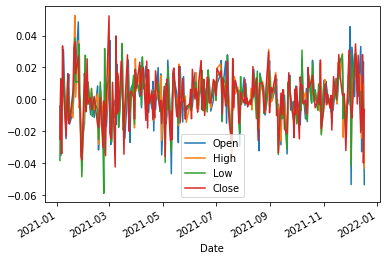

In [15]:
data_log_ratio[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

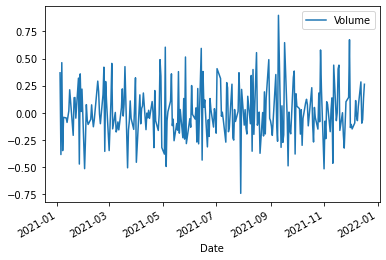

In [16]:
data_log_ratio[['Volume']].plot()

# Log Diff = Log(T) - Log(T-1)

In [17]:
data_log_diff = data.copy()
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,133.258497,133.914457,130.912956,131.877014,99116600
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200


In [18]:
data_log_diff = data_log_diff.apply(np.log)
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,4.892291,4.897201,4.874533,4.881870,18.411807
2021-01-04,4.888105,4.888779,4.836150,4.856840,18.780464
2021-01-05,4.852814,4.874685,4.849238,4.869128,18.397053
2021-01-06,4.843695,4.869433,4.833147,4.834887,18.859503
2021-01-07,4.848693,4.873849,4.844790,4.868441,18.512149


In [19]:
data_log_diff_t = data_log_diff
data_log_diff_t_minus_1 = data_log_diff.shift(1)
data_log_diff = data_log_diff_t - data_log_diff_t_minus_1
data_log_diff.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,0.004185,0.008422,0.038383,0.025030,-0.368657
2021-01-04,0.035292,0.014095,-0.013089,-0.012288,0.383411
2021-01-05,0.009119,0.005251,0.016091,0.034241,-0.462450
2021-01-06,-0.004998,-0.004416,-0.011643,-0.033554,0.347354
2021-01-07,-0.031215,-0.007568,-0.018366,-0.008594,0.041173


<AxesSubplot:xlabel='Date'>

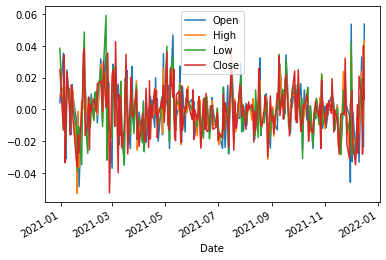

In [20]:
data_log_diff[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

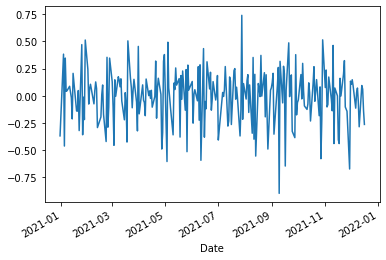

In [21]:
data_log_diff['Volume'].plot()

Now I realized that is the same thing. DUUUUUH!

# Difference Between the Mean = T - Mean

In [22]:
data_diff_mean = data.copy()
data_diff_mean = data_diff_mean.loc[(data_diff_mean.index > '2021-01-01') & (data_diff_mean.index < '2021-01-10')]
data_diff_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200


In [23]:
data_diff_mean.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200


<AxesSubplot:xlabel='Date'>

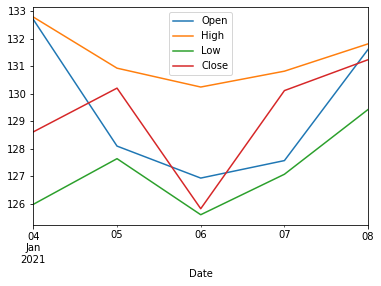

In [24]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

In [25]:
average_price = data_diff_mean.mean(axis=0)
average_price

Open      1.293864e+02
High      1.313224e+02
Low       1.271482e+02
Close     1.292015e+02
Volume    1.221582e+08
dtype: float64

In [26]:
data_diff_mean = average_price - data_diff_mean
data_diff_mean.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,-3.315557,-1.468933,1.164822,0.584401,-21143660.0
2021-01-05,1.286057,0.389582,-0.494958,-1.005809,24493340.0
2021-01-06,2.448899,1.075369,1.542489,3.377179,-32929760.0
2021-01-07,1.812826,0.498926,0.071559,-0.916347,12580040.0
2021-01-08,-2.232225,-0.494943,-2.283912,-2.039424,17000040.0


<AxesSubplot:xlabel='Date'>

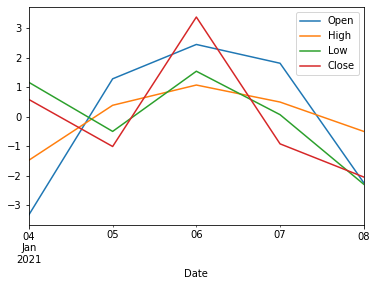

In [27]:
data_diff_mean[['Open', 'High', 'Low', 'Close']].plot()

This method looks exciting

<AxesSubplot:xlabel='Date'>

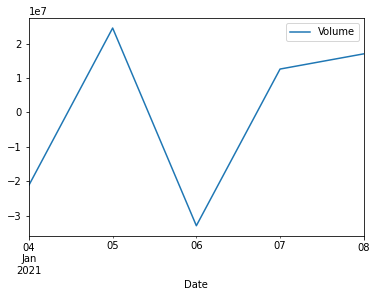

In [28]:
data_diff_mean[['Volume']].plot()

We should find another way to scale the volume

# Relative Values - T-N, T-N+1 ... T-1 / T

In [29]:
data_relative = data.copy()
data_relative = data_relative.loc[(data_relative.index > '2021-01-01') & (data_relative.index < '2021-01-10')]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.701914,132.791359,125.983331,128.617096,143301900
2021-01-05,128.100300,130.932844,127.643112,130.207306,97664900
2021-01-06,126.937458,130.247057,125.605665,125.824318,155088000
2021-01-07,127.573531,130.823500,127.076595,130.117844,109578200
2021-01-08,131.618582,131.817369,129.432065,131.240921,105158200


In [30]:
data_relative[['Open', 'High', 'Low', 'Close']] /= data['Close'].iloc[-1]
data_relative['Volume'] /= data['Volume'].iloc[-1]
data_relative.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,0.775400,0.775922,0.736142,0.751531,0.733254
2021-01-05,0.748512,0.765063,0.745840,0.760823,0.499737
2021-01-06,0.741717,0.761056,0.733935,0.735213,0.793562
2021-01-07,0.745434,0.764424,0.742530,0.760301,0.560695
2021-01-08,0.769070,0.770231,0.756293,0.766863,0.538079


<AxesSubplot:xlabel='Date'>

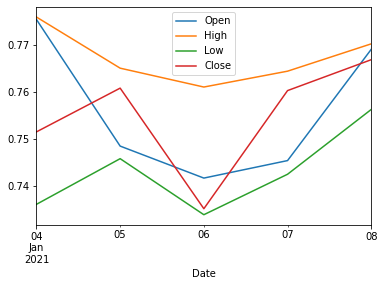

In [31]:
data_relative[['Open', 'High', 'Low', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

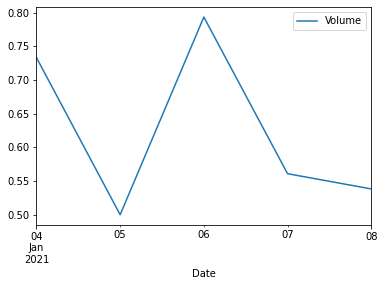

In [32]:
data_relative[['Volume']].plot()

# Normalization

In [33]:
data_for_norm = data.copy()
normalizer = preprocessing.Normalizer().fit(data_for_norm)

In [34]:
data_for_norm = normalizer.transform(data_for_norm)
data_for_norm[:5]

array([[1.34446195e-06, 1.35108001e-06, 1.32079749e-06, 1.33052399e-06,
        1.00000000e+00],
       [9.26030389e-07, 9.26654560e-07, 8.79146273e-07, 8.97525406e-07,
        1.00000000e+00],
       [1.31163089e-06, 1.34063358e-06, 1.30694970e-06, 1.33320472e-06,
        1.00000000e+00],
       [8.18486655e-07, 8.39826790e-07, 8.09899313e-07, 8.11309179e-07,
        1.00000000e+00],
       [1.16422364e-06, 1.19388254e-06, 1.15968865e-06, 1.18744279e-06,
        1.00000000e+00]])

In [35]:
data_for_norm[-5:]

array([[1.18195994e-06, 1.18855110e-06, 1.14548052e-06, 1.14685099e-06,
        1.00000000e+00],
       [1.25735039e-06, 1.27521521e-06, 1.23553962e-06, 1.25074976e-06,
        1.00000000e+00],
       [1.33607196e-06, 1.36956722e-06, 1.31470822e-06, 1.36804127e-06,
        1.00000000e+00],
       [1.19372137e-06, 1.20610603e-06, 1.13692506e-06, 1.14697924e-06,
        1.00000000e+00],
       [8.69506447e-07, 8.87620144e-07, 8.68278453e-07, 8.75697871e-07,
        1.00000000e+00]])

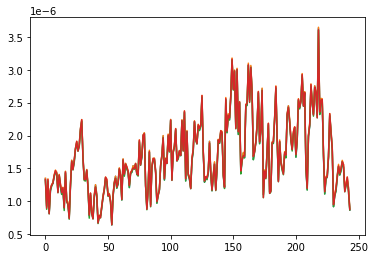

In [36]:
plt.plot(data_for_norm[:, :4])

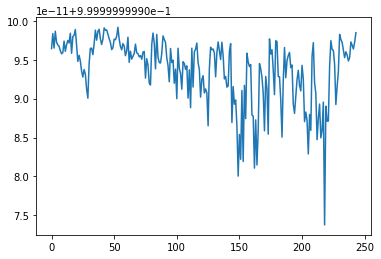

In [37]:
plt.plot(data_for_norm[:, 4])

# Robust Scaler

<AxesSubplot:xlabel='Date'>

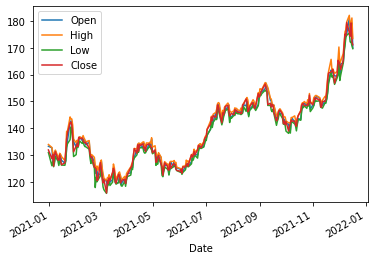

In [38]:
data_for_scaling = data.copy()
normalizer = preprocessing.RobustScaler().fit(data_for_scaling)
data_for_scaling[['Open', 'High', 'Low', 'Close']].plot()

In [39]:
data_for_scaling = normalizer.transform(data_for_scaling)
data_for_scaling[:5]

array([[-0.18778717, -0.27107515, -0.23039617, -0.27619148,  0.3383839 ],
       [-0.21497567, -0.32771022, -0.47343094, -0.43514247,  1.51317258],
       [-0.4397598 , -0.42143058, -0.39160234, -0.35760511,  0.29978643],
       [-0.49656341, -0.45601313, -0.49205023, -0.57131607,  1.82653872],
       [-0.4654919 , -0.42694453, -0.4195321 , -0.36196722,  0.61653454]])

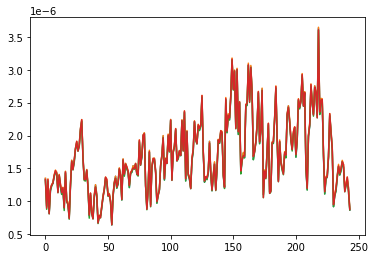

In [40]:
plt.plot(data_for_norm[:, :4])

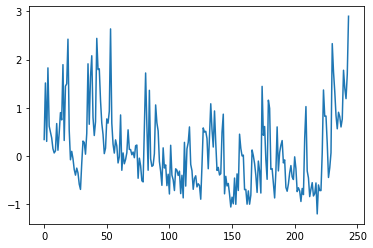

In [41]:
plt.plot(data_for_scaling[:, 4])